# Добро пожаловать в мир дифференцируемых функций

Для начала небольшой ликбез, кто в школе ещё не проходил начала анализа.

**Производная**. Интуитивно, производной называют скорость изменения функции. Давайте изменим $x$ на какой-то очень малый $\Delta x$, посмотрим какой получился $Delta y$, а их отношение $\frac{\Delta y}{\Delta x}$ назовем производной. Это можно записать так:

$$ f'(x) = \frac{\Delta y}{\Delta x} = \frac{f(x+\Delta x) - f(x)}{\Delta x}, \quad \Delta x \to 0 $$

Для элементарных функций её в основном считают, пользуясь этим определением. Например для функции $x^2$ она такая:

$$ f'(x) = (x^2)' = \frac{(x+\Delta x)^2 - x^2}{\Delta x} = \frac{2x\Delta x + \Delta x^2}{\Delta x} = 2x + \Delta x \to 2x $$

У производной очень много полезных свойств, позволяющих нам исследовать функции. Например, точке экстремума (то есть минимума, максимума или «седловой» точке) производная должна равняться нулю. Поэтому большинство простых задач на оптимизацию функции заключается в том, чтобы посчитать её производную (не фиксируя $x$), приравнять к нулю и посмотреть, в каких точках это равенство выполняется. 

**Градиент**. Что, если у нас фукция от нескольких переменных? В таком случае вводят обобщение производной — градиент. Это вектор (набор чисел), каждой компонентой которого является значение производной по очередному аргументу при фиксированных остальных.

**Ок, зачем он нужен?** Пусть у нас есть какая-нибудь функция, которую мы хотим минимизировать, и мы предполагаем, что она выглядит как что-то типа гладкой ямы. Тогда мы можем попытаться действовать так: начнем с какой-нибудь точки и будем делать много очень маленьких шажков в сторону наибольшего уменьшения функции, пока не придем в локальный минимум.

* Что значит «в сторону наибольшего уменьшения»? Это значит «против градиаента».
* Что такое «маленький шажок»? Это значит $-\lambda \cdot (f'_1, f'_2, \ldots, f'_n)$. Обычно $\lambda$ это что-то типа $10^{-3}$. Этот параметр называется learning rate (скорость обучения).
* Что значит «пока не придём в локальный минимум». Это значит «пока градиент не ноль». На практике будем проверять, что норма (т. е. длина вектора) больше определенного очень малого $\epsilon$.

![grad_descent](images/gradient_descent.png)

Если learning rate достоаточно маленький, мы точно придем хотя бы в локальный минимум. Этот метод называется **градиаентным спуском**, и он очень часто применяется для оптимизации тех функций, у которых везде можно быстро посчитать градиент. Гарантированно находить глобальный минимум произвольной функции пока наука не умеет и вряд ли когда-либо научится.

# Ок, зачем это надо?

Определим следующую «иерархию хороших функций»:

* Аналитически решаемые, то есть минимум которых можно выразить какой-то простой формулой. Например, таким является линейная регрессия — можно взять производную, приравлять к нулю и выразить сразу все параметры.
* Выпуклые. У них гарантируется решение, причём единственное. Его можно найти разными методами, в частности градиентным спуском, но обычно даже быстрее, чем спуском. Пример: логистическая регрессия.
* Дифференцируемые. К ним можно применить градиентный спуск, но нужно очень много изворачиваться, чтобы он сошелся не к локальному минимуму, а к глобальному. **<-- YOU ARE HERE**
* Дискретные. Тут всё грустно, но нам хотя бы можно быстро узнать её значение.
* Невычислимые. Иногда нам нужно оценивать что-нибудь совсем не формализуемое математикой — например, качество перевода, или поведение пользователя. Невычислимыми функциями в частности занимается Reinforcement Learning.

Глубокое обучение — это про все методы, чьи функции потерь достаточно хорошие — то есть имеют производную.

![hierarchy](images/hierarchy.png)

# Как устроен цикл обучения

В уже рассмотренных в курсе общего ML алгоритмов не было такого понятия, как цикл обучения. Все методы обучались сразу или почти каким-то аналитическим образом. Здесь же это важно, потому что нейросети обучаются очень долго — иногда по несколько недель на очень мощном и дорогом оборудовании — чтобы «сойтись» и дать какой-то результат.

На вход нейросети подаются какие-то векторизованные данные (все действительные числа). С ними происходят какие-то последовательные преобразования, после чего то, что получилось «скармливается» в функцию потерь, которая возвращает какое-то число, которое нужно минимизировать. Концепция не сильно изменилась, только теперь все преобразования (включая функцию потерь) у нас дифференцируемые, чтобы к ним можно было применить градиентный спуск.

![nn](images/nn.png)

**Как на самом деле оно считается.** То, что мы описали, реализовывать в таком виде очень неэффективно. Вот как это оптимизировать:

* Чтобы сделать обновление параметров, не обязательно проходить по всему датасету и считать градиент каждого и складывать. Достаточно взять сколько-нибудь случайных сэмплов и посчитать градиент на них и использовать для обновления весов. Получится оценка шумная, но достаточно точная для одного обновления. Такое подмножество называется батчем, а сам метод называют **стохастическим градиентным спуском**.
* Есть разные методы, позволяющие выбираться из локальных минимумов. Представьте, что наш вектор всех-всех-всех параметров — это мячик, и он куда-то катится и обладает какой-то инерцией.
* Градиенты нужно ещё посчитать. Делать это для каждого параметра отдельно очень долго. Это делается с помощью алгоритма, напоминающего. Вдаваться в подробности его работы мы не будем, но, если хотите когда-нибудь заниматься DL серьёзнее, то осознать его обязательно.

**Фреймворки**. Я не хочу вас заставлять считать производные самим. Закодить весь цикл обучение нейросетей вручную очень полезно, но это нужно сделать ровно один раз в жизни, чтобы никогда больше такой фигней не заниматься. Существует множество фреймворков, работающих с нейросетями, которые считают эти градиенты и оптимизируют сети и делают прочую неблагодарную работу за нас, предлагая нам по-просту в декларативном стиле описать нужные нам преобразования. В конечном счете, за 10-20 строками кода на Keras будут стоять несколько тысяч строк кода низкоуровневых библиотек. **Ни один адекватный человек в мире не кодит нейросети вручную**.

# Keras

Мы выбрали Keras в качестве фреймворка. Он самый простой для понимания.

Есть стандартный датасет, называется MNIST. В нем 60000 картинок с рукописными цифрами 28x28, по 6000 на каждую цифру от 0 до 9. Требуется правильно их классифицировать.

In [30]:
import keras
from keras.layers import Dense # «плотный» слой — матричное умножение
from keras.models import Sequential # вспомогательный класс, позволяющий последовательно выполнять операции

In [31]:
from keras.datasets import mnist # датасет настолько известный, что он есть по умолчанию почти везде
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(X, y), _ = mnist.load_data()

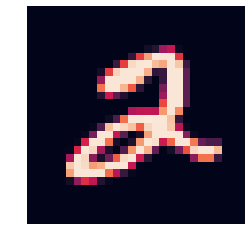

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.axis('off')
plt.imshow(X[5])
plt.show()

Особенности формата: сейчас каждая картинка представляет собой трехмерные массивы (напомним, что многомерные массивы называют тензорами) размера n x 28 x 28. Мы хотим представить каждую как вектор размера $784 = 28^2$.

In [8]:
X = X.reshape(60000, 784)

Ещё одна деталь: инициализация весов — отдельное искусство. Очень важно, чтобы они изначальны были не совсем далеко от желаемых, иначе градиентный спуск будет шагать уж очень далеко. В фреймворках оно опять же сделано за нас, но так, что предполагает, что входные данные — числа порядка единицы, а сейчас они от 0 до 255. Исправим это:

In [9]:
X = X.astype('float32')
X /= 255

**Про функцию потерь**. Напоминаем интуицию за принципом максимального правдоподобия: максимизируем произведение прсказанных вероятностей реальных событий $ L = \prod p_i $.

Произведение оптимизировать очень не удобно, и поэтому воспользуемся следующим трюком: возьмем логарифм (любой, ведь все логарифмы отличаются в константу раз) и будем максимизировать сумму:

$$ \log L = \log \prod p_i = \sum \log p_i $$

Эту штуку называют кроссэнтропией. Такое название пошло из теории информации, но нам пока знать это не надо.

Для удобноства вместо чисел — от 0 до 9 — сконвертируем их в вектора размера 10, где будет стоять единица в нужном месте (такая кодировка называется one-hot).

In [11]:
y = keras.utils.to_categorical(y, 10)

Собственно, вот в чем прелесть Keras: вся модель описывается в пять строчек.

In [12]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

Есть специальная функция, которая позволит проверить, что мы все сделали правильно.

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
_________________________________________________________________


Keras оборачивает *статические* фреймворки. Им нужно скомпилировать сеть, заранее передав функцию потерь, оптимизатор и, опционально, желаемые метрики.

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Давайте обрежем X и y, чтобы обучалось побыстрее
X = X[:5000]
y = y[:5000]

# history нам поможет строить всякие графики
history = model.fit(X, y,
          batch_size=32,
          epochs=20,
          validation_split=0.1)

Train on 4500 samples, validate on 500 samples
Epoch 1/20
4500/4500 [==============================] - 1s - loss: 0.0545 - acc: 0.9873 - val_loss: 0.0481 - val_acc: 0.9900
Epoch 2/20
4500/4500 [==============================] - 1s - loss: 0.0494 - acc: 0.9896 - val_loss: 0.0450 - val_acc: 0.9860
Epoch 3/20
4500/4500 [==============================] - 1s - loss: 0.0448 - acc: 0.9913 - val_loss: 0.0477 - val_acc: 0.9900
Epoch 4/20
4500/4500 [==============================] - 1s - loss: 0.0410 - acc: 0.9918 - val_loss: 0.0486 - val_acc: 0.9880
Epoch 5/20
4500/4500 [==============================] - 1s - loss: 0.0376 - acc: 0.9927 - val_loss: 0.0496 - val_acc: 0.9860
Epoch 6/20
4500/4500 [==============================] - 1s - loss: 0.0351 - acc: 0.9936 - val_loss: 0.0502 - val_acc: 0.9880
Epoch 7/20
4500/4500 [==============================] - 1s - loss: 0.0327 - acc: 0.9947 - val_loss: 0.0504 - val_acc: 0.9860
Epoch 8/20
4500/4500 [==============================] - 1s - loss: 0.0305 - ac

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

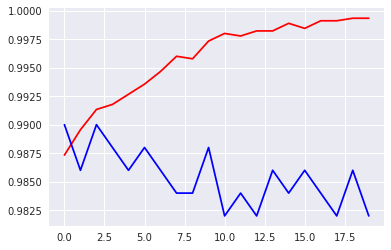

In [22]:
plt.plot(history.history['acc'], c='r')
plt.plot(history.history['val_acc'], c='b')
plt.show()

Попробуйте поиграться с параметрами сети. Попробуйте поставить другую функцию потерь, чтобы убедиться, что кроссэнтропия действительно лучше всех коррелирует с точностью.

Вот список крутых преобразований и регуляризаторов, которые могут зайти:
* Sigmoid
* Tanh
* ReLU
* Leaky ReLU
* Dropout

Разные оптимизаторы:
* Adam
* RMSProp
* SGD
* Adadelta

Поэксперементируйте c learning rate и batch size. Постройте графики. Поизменяйте размеры слоев и попробуйте разную регуляризацию.

Убедитесь, что sigmoid в промежутках пихать — плохая идея, а logloss лучше всех коррелирует с accuracy для классификации.

Зайдите на (123)[https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.16907&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false].